In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.dates as mdates

c:\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_excel('grocery_price.xlsx', index_col=None)
dataset.head()

,Date,10/03/2021,11/03/2021,12/03/2021,13/03/2021,14/03/2021,15/03/2021,16/03/2021,17/03/2021,18/03/2021,...,18/12/2023,19/12/2023,20/12/2023,21/12/2023,22/12/2023,23/12/2023,24/12/2023,25/12/2023,26/12/2023,27/12/2023
0,Beras,11.5,11.5,11.5,11.5,11.5,11.5,11.61,12.10,11.72,...,14.37,14.37,14.35,14.27,14.33,14.41,14.34,14.33,14.37,14.42
1,Gula Pasir,14.0,14.0,14.0,14.0,14.0,14.0,13.56,13.41,13.60,...,17.77,17.71,17.76,17.80,17.77,17.73,17.72,17.74,17.73,17.73
2,Minyak Goreng,14.5,14.0,14.0,14.0,14.0,14.0,14.26,13.96,14.13,...,17.50,17.40,17.48,17.42,17.14,17.65,17.27,17.47,17.21,17.45


In [3]:
# transform data to from row to column
dataset = dataset.T
dataset.columns = dataset.iloc[0]
dataset = dataset.drop(dataset.index[0])

dataset.head()

Date,Beras,Gula Pasir,Minyak Goreng
10/03/2021,11.5,14.0,14.5
11/03/2021,11.5,14.0,14.0
12/03/2021,11.5,14.0,14.0
13/03/2021,11.5,14.0,14.0
14/03/2021,11.5,14.0,14.0


In [4]:
# add new column to dataset, average of all column 
dataset['Average'] = round(dataset.mean(axis=1),2)

# remove column 2
dataset = dataset.drop(dataset.columns[0:3], axis=1)

dataset.head()

Date,Average
10/03/2021,13.33
11/03/2021,13.17
12/03/2021,13.17
13/03/2021,13.17
14/03/2021,13.17


In [5]:
# split data into training, validation, and test
# 80, 20, 28 hari
train_data = dataset.iloc[0:791] 
validation_data = dataset.iloc[791:995] 
test_data = dataset.iloc[995:1023] 

# change to numpy array
train_data = train_data.values
validation_data = validation_data.values

train_data

array([[13.33],
       [13.17],
       [13.17],
       [13.17],
       [13.17],
       [13.17],
       [13.14],
       [13.16],
       [13.15],
       [13.2 ],
       [13.2 ],
       [13.25],
       [13.17],
       [13.27],
       [13.2 ],
       [13.16],
       [13.24],
       [13.18],
       [13.12],
       [13.22],
       [13.21],
       [13.16],
       [13.24],
       [13.15],
       [13.1 ],
       [13.23],
       [13.19],
       [13.18],
       [13.26],
       [13.18],
       [13.2 ],
       [13.21],
       [13.08],
       [13.26],
       [13.18],
       [13.25],
       [13.24],
       [13.26],
       [13.2 ],
       [13.3 ],
       [13.26],
       [13.18],
       [13.12],
       [13.24],
       [13.35],
       [13.33],
       [13.25],
       [13.21],
       [13.21],
       [13.29],
       [13.23],
       [13.18],
       [13.27],
       [13.24],
       [13.2 ],
       [13.26],
       [13.25],
       [13.21],
       [13.31],
       [13.19],
       [13.34],
       [13.26],
       [

In [6]:
# normalize using minmaxscaler


sc = MinMaxScaler(feature_range=(0,1))
train_data_scaled = sc.fit_transform(train_data)
validation_data_scaled = sc.fit_transform(validation_data)
train_data_scaled

array([[0.07331378],
       [0.02639296],
       [0.02639296],
       [0.02639296],
       [0.02639296],
       [0.02639296],
       [0.01759531],
       [0.02346041],
       [0.02052786],
       [0.03519062],
       [0.03519062],
       [0.04985337],
       [0.02639296],
       [0.05571848],
       [0.03519062],
       [0.02346041],
       [0.04692082],
       [0.02932551],
       [0.01173021],
       [0.04105572],
       [0.03812317],
       [0.02346041],
       [0.04692082],
       [0.02052786],
       [0.0058651 ],
       [0.04398827],
       [0.03225806],
       [0.02932551],
       [0.05278592],
       [0.02932551],
       [0.03519062],
       [0.03812317],
       [0.        ],
       [0.05278592],
       [0.02932551],
       [0.04985337],
       [0.04692082],
       [0.05278592],
       [0.03519062],
       [0.06451613],
       [0.05278592],
       [0.02932551],
       [0.01173021],
       [0.04692082],
       [0.07917889],
       [0.07331378],
       [0.04985337],
       [0.038

In [7]:
# create input sequences

def create_sequences(data, seq_length=60):
    x=[]
    y=[]
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i,0])
        y.append(data[i,0])
    return np.array(x), np.array(y)

x_train, y_train = create_sequences(train_data_scaled)
x_val, y_val = create_sequences(validation_data_scaled)

# reshape input for model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

In [8]:
# Building the LSTM Model
model = keras.Sequential()
model.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1))

In [9]:
#  Compiling the LSTM Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the Model and store history
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

# export model
model.save('LSTM.h5')

Epoch 1/100
23/23 [==============================] - 6s 83ms/step - loss: 0.0698 - val_loss: 0.0159
Epoch 2/100
23/23 [==============================] - 1s 46ms/step - loss: 0.0167 - val_loss: 0.0155
Epoch 3/100
23/23 [==============================] - 1s 48ms/step - loss: 0.0121 - val_loss: 0.0080
Epoch 4/100
23/23 [==============================] - 1s 48ms/step - loss: 0.0104 - val_loss: 0.0079
Epoch 5/100
23/23 [==============================] - 1s 45ms/step - loss: 0.0089 - val_loss: 0.0076
Epoch 6/100
23/23 [==============================] - 1s 47ms/step - loss: 0.0081 - val_loss: 0.0089
Epoch 7/100
23/23 [==============================] - 1s 46ms/step - loss: 0.0073 - val_loss: 0.0089
Epoch 8/100
23/23 [==============================] - 1s 47ms/step - loss: 0.0072 - val_loss: 0.0048
Epoch 9/100
23/23 [==============================] - 1s 45ms/step - loss: 0.0072 - val_loss: 0.0043
Epoch 10/100
23/23 [==============================] - 1s 46ms/step - loss: 0.0066 - val_loss: 0.0059

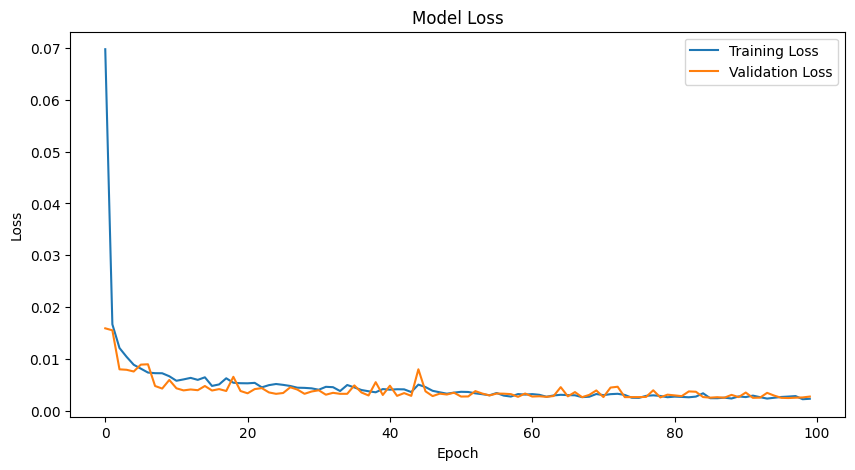

In [10]:
# Plot loss and accuracy during training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:

real_price = test_data.iloc[:,0].values.reshape(-1,1)
real_price

array([[16.35],
       [16.49],
       [16.47],
       [16.34],
       [16.59],
       [16.49],
       [16.48],
       [16.46],
       [16.55],
       [16.3 ],
       [16.47],
       [16.53],
       [16.53],
       [16.57],
       [16.56],
       [16.54],
       [16.52],
       [16.57],
       [16.55],
       [16.49],
       [16.53],
       [16.5 ],
       [16.41],
       [16.6 ],
       [16.44],
       [16.51],
       [16.44],
       [16.53]])

In [12]:
dataset_total = pd.concat((dataset['Average'], test_data['Average']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [13]:
predicted_price = model.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

# round each value in predicted_price
predicted_price = np.round(predicted_price,2)

1/1 [==============================] - 1s 673ms/step


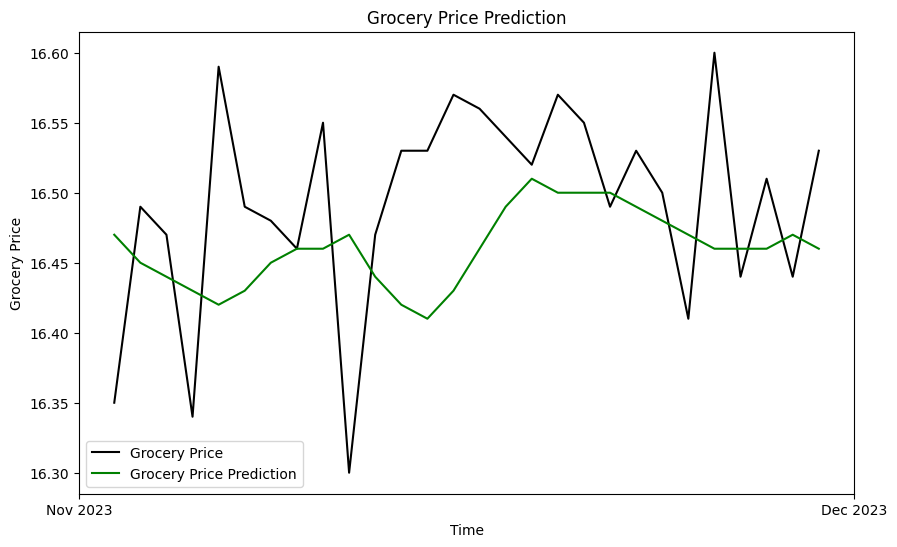

In [14]:
# Prepare dates for the predicted stock prices
date_range = pd.date_range(start='2023-11-30', periods=len(predicted_price), freq='D') 

# visualizing the results
plt.figure(figsize=(10, 6))
plt.plot(date_range, real_price, color='black', label='Grocery Price')
plt.plot(date_range, predicted_price, color='green', label='Grocery Price Prediction')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show tick marks for every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis labels as 'Jan 2023', 'Feb 2023', etc.
plt.title('Grocery Price Prediction')
plt.xlabel('Time')
plt.ylabel('Grocery Price')
plt.legend()
plt.show()